In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats


In [2]:
df=pd.read_csv('Main Dataset.csv')

In [3]:
df.tail()

,year,male incidence in higher healthcare countries,female incidence in higher healthcare countries,both sexes incidence in higher healthcare countries,male mortality in higher healthcare countries,female mortality in higher healthcare countries,both sexes mortality in higher healthcare countries,both sexes MIR in higher healthcare countries,male MIR in higher healthcare countries,female MIR in higher healthcare countries,...,male incidence in moderate healthcare countries,female incidence in moderate healthcare countries,both sexes incidence in moderate healthcare countries,male mortality in moderate healthcare countries,female mortality in moderate healthcare countries,both sexes mortality in moderate healthcare countries,both sexes MIR in moderate healthcare countries,male MIR in moderate healthcare countries,female MIR in moderate healthcare countries,Govt expense of moderate healthcare countries
11,2012,230852.0,204325.0,435177,98101.0,84986.0,183087,0.420718,0.424952,0.415935,...,191753.0,180671.0,372424,61579.0,88707.0,150286,0.403535,0.321137,0.490986,88544
12,2013,236388.0,210021.0,446409,98366.0,84705.0,183071,0.410097,0.416121,0.403317,...,194985.0,183125.0,378110,62648.0,89389.0,152037,0.402097,0.321297,0.488131,93116
13,2014,242119.0,216871.0,458990,98881.0,85755.0,184636,0.402266,0.408398,0.395419,...,195273.0,176244.0,371517,63403.0,90586.0,153989,0.414487,0.324689,0.513981,99348
14,2015,247945.0,219309.0,467254,101535.0,86838.0,188373,0.403149,0.409506,0.395962,...,196342.0,173771.0,370113,63981.0,90536.0,154517,0.417486,0.325865,0.521008,95403
15,sum,NaN,NaN,6033864,NaN,NaN,2625327,0.435099,NaN,NaN,...,NaN,NaN,4728320,NaN,NaN,2155267,0.455821,NaN,NaN,1034986


In [4]:
from statsmodels.stats.weightstats import ttest_ind

In [5]:
from scipy.stats import levene
levene(df['female MIR in higher healthcare countries'].loc[0:14], df['female MIR in moderate healthcare countries'].loc[0:14])

#levene test to check whether the variances are same or not

LeveneResult(statistic=12.281514711623485, pvalue=0.0015581311066527864)

In [6]:
#pingouin t test
pg.ttest(df['female MIR in higher healthcare countries'].loc[0:14], df['female MIR in moderate healthcare countries'].loc[0:14],paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.225043,28,two-sided,0.000001,"[-0.2, -0.1]",2.273064,1.185e+04,0.999973


In [7]:
pg.ttest(df['both sexes MIR in higher healthcare countries'].loc[0:9], df['both sexes MIR in moderate healthcare countries'].loc[0:9], paired=False)

#from 2001 to 2010

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.263251,18,two-sided,0.036217,"[-0.08, -0.0]",1.012157,2.106,0.572099


In [8]:
pg.ttest(df['both sexes MIR in higher healthcare countries'].loc[10:11], df['both sexes MIR in moderate healthcare countries'].loc[10:11], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,20.119204,2,two-sided,0.002461,"[0.01, 0.02]",20.119204,8.489,1.0


In [9]:
pg.ttest(df['both sexes MIR in higher healthcare countries'].loc[12:14], df['both sexes MIR in moderate healthcare countries'].loc[12:14], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.162523,4,two-sided,0.309654,"[-0.02, 0.01]",0.949196,0.794,0.147934


In [10]:
from scipy.stats import levene
levene(df['Govt expense of higher healthcare countries'].loc[0:14], df['Govt expense of moderate healthcare countries'].loc[0:14])
#the variances are not equal

LeveneResult(statistic=10.820687662299298, pvalue=0.002712361028770648)

In [11]:
pg.ttest(df['Govt expense of higher healthcare countries'].loc[0:14], df['Govt expense of moderate healthcare countries'].loc[0:14],paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.559394,28,two-sided,4.118505e-07,"[79821.54, 152314.33]",2.395152,2.636e+04,0.999994


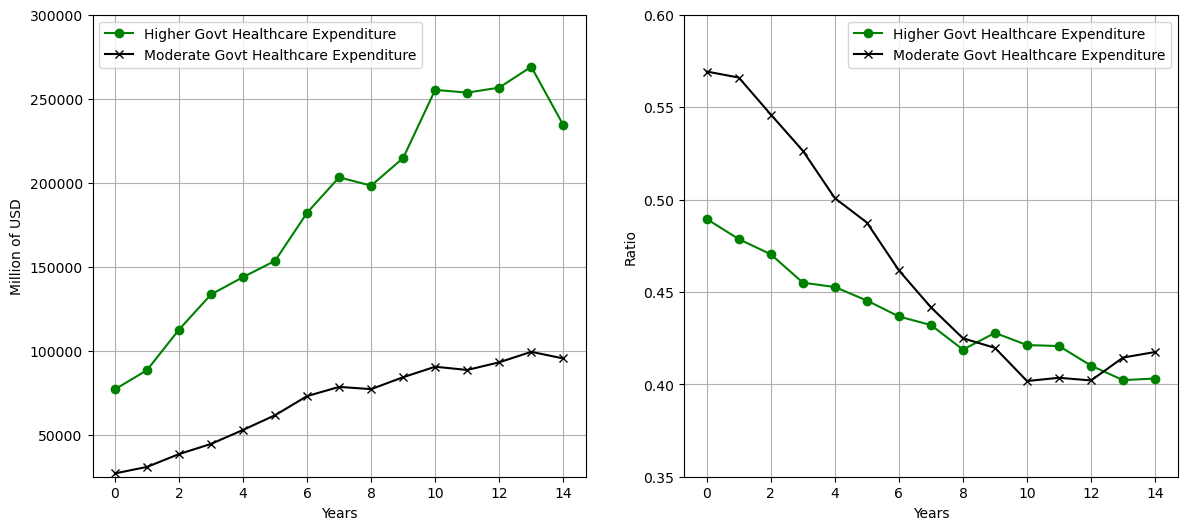

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
index = np.arange(len(df['year'].loc[0:14]))
ax1.plot(index,df['Govt expense of higher healthcare countries'].loc[0:14],label='Higher Govt Healthcare Expenditure', marker='o',color='green')
ax1.plot(index,df['Govt expense of moderate healthcare countries'].loc[0:14],label='Moderate Govt Healthcare Expenditure', marker='x',color="black")
ax1.legend()
ax1.grid()

ax1.set_xlabel("Years",fontsize=10)
ax1.set_ylabel("Million of USD",fontsize=10)
ax1.set_ylim([25000, 300000])

#2nd plot 
ax2.plot(index,df['both sexes MIR in higher healthcare countries'].loc[0:14],label='Higher Govt Healthcare Expenditure', marker='o',color='green')
ax2.plot(index,df['both sexes MIR in moderate healthcare countries'].loc[0:14],label='Moderate Govt Healthcare Expenditure', marker='x',color="black")
ax2.legend()
ax2.grid()

ax2.set_xlabel("Years",fontsize=10)
ax2.set_ylabel("Ratio",fontsize=10)
ax2.set_ylim([0.35, 0.6])

plt.legend()

# Show the plot  
plt.show()

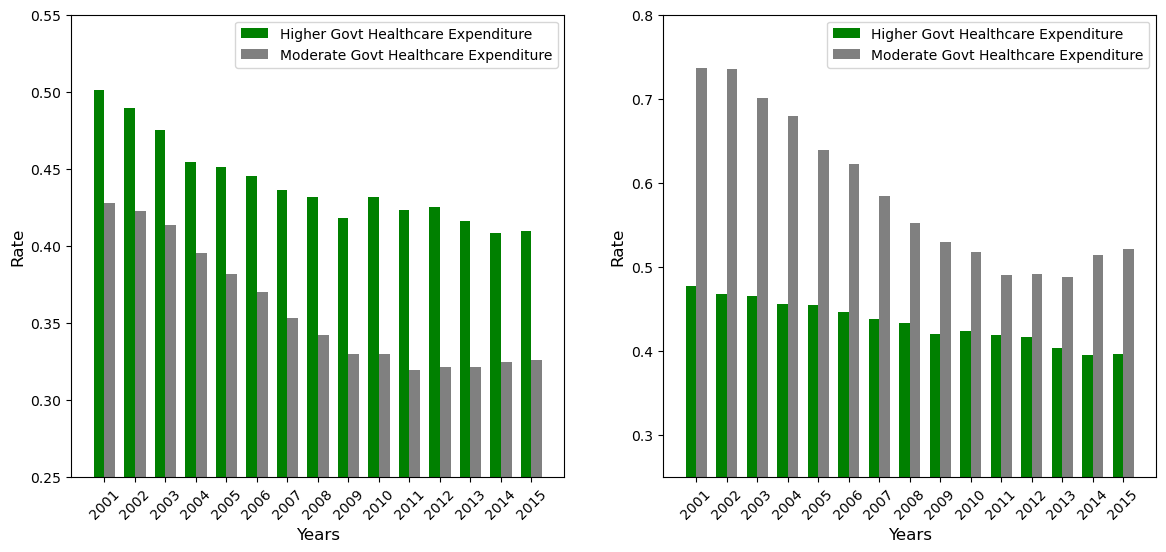

In [13]:
# Create a figure and subplots  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Column (bar) graph  
bar_width = 0.35
# Generate an array of positions for the bars
index = np.arange(len(df['year'].loc[0:14]))
# Plot the bar chart for Higher Healthcare Countries
ax1.bar(index, df['male MIR in higher healthcare countries'].loc[0:14], bar_width, color='green', label='Higher Govt Healthcare Expenditure')
# Plot the bar chart for Moderate Healthcare Countries, offset by the bar width
ax1.bar(index + bar_width, df['male MIR in moderate healthcare countries'].loc[0:14], bar_width, color='grey', label='Moderate Govt Healthcare Expenditure')
# Add labels, title, and a legend
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(df['year'].loc[0:14], rotation=45)

ax1.set_xlabel('Years',fontsize=12)
ax1.set_ylabel('Rate',fontsize=12)
ax1.set_ylim([0.25, 0.55])
ax1.legend()


bar_width = 0.35
# Generate an array of positions for the bars
index = np.arange(len(df['year'].loc[0:14]))
# Plot the bar chart for Higher Healthcare Countries
ax2.bar(index, df['female MIR in higher healthcare countries'].loc[0:14], bar_width, color='green', label='Higher Govt Healthcare Expenditure')
# Plot the bar chart for Moderate Healthcare Countries, offset by the bar width
ax2.bar(index + bar_width, df['female MIR in moderate healthcare countries'].loc[0:14], bar_width, color='grey', label='Moderate Govt Healthcare Expenditure')
# Add labels, title, and a legend
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(df['year'].loc[0:14], rotation=45)

ax2.set_xlabel('Years',fontsize=12)
ax2.set_ylabel('Rate',fontsize=12)
ax2.set_ylim([0.25, 0.8])
ax2.legend()

# Adjust layout  

plt.legend()

# Show the plot  
plt.show()